# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [20]:
import numpy as np
import matplotlib.pyplot as plt
temp = np.array(df['temperature'])

###  1 . Theoretical CDF and ECDF of the data

I will compute the temp array's theoretical CDF with 100,000 random samples and overlay it with the data's actual ecdf to verify if the data is in fact normally distributed

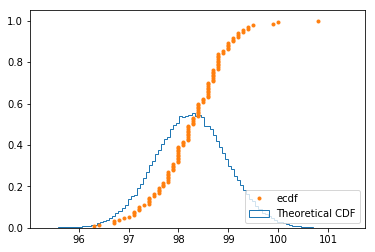

In [52]:
#Getting the mean and standard deviation of the data
temp_mean = np.mean(temp)
temp_std = np.std(temp)

#Getting 100,000 random samples from our data to compute it's theoretical CDF
cdf_temp = np.random.normal(temp_mean,temp_std, size=100000)

_ = plt.hist(cdf_temp, bins = 100 , normed = True , histtype = 'step')

#Writing a function that computes the data to visualize the ecdf of an array
def ecdf(array:'nump array'):
    n = len(array)
    x = np.sort(array)
    y = np.arange(1 , n + 1) / n
    
    return x,y

#Computing the x_axis and y_axis values to visualize the ecdf of our data
temp_x_ecdf, temp_y_ecdf = ecdf(temp)

#Plotting it on the same graph as our theoretical CDF
_ = plt.plot(temp_x_ecdf, temp_y_ecdf, marker = '.', linestyle = 'none')

_ = plt.legend(('ecdf', 'Theoretical CDF'), loc='lower right')
plt.show()

#### Conclusion: The theoretical CDF of the probability distribution of our data contains a symmetrical peak and with the  overlayed ecdf of our data we can conclude that our data is normally distributed

### 2. Determining the sample size 

In [55]:
n = len(temp)
n

130

#### Conclusion: Since our sample size (n) > 30, hence the sample size is large enough for the Central Limit Theorem. Furthermore, the observations are also independent as the body temperature of an individual has no bearing on the body temperature of another individual which implies that the CLT holds true for our data.

### 3. True population mean

To test the null hypothesis that the true mean(m) = 98.6 degree Fahrenheit.

I will use a one sample test because we are only interested in the mean of one population and the T-test becuase even though the sample size is large enough to apply a Z-test (n > 30), we do not know the population standard deviation.

Under these circumstances a one sample T-test would help us best test our null hypothesis.

The T-statistic for testing our hypothesis is the difference between the theoretical true mean (98.6 degree Fahrenheit) and the computed sample mean

I will shift the mean of the sample to the theoretical true mean(98.6 degree Fahremheit) to stimulate data under the assumption that the null hypothesis is true.

I will use bootstrap resampling to generate 100,000 boostrap replicates to compare against the observed diiference in the true mean and the sample mean in degree Farenheit in order to determine statistical significance using the computed p-value.

In [141]:
#Computing observed difference between the theoretical true mean and the actual sample mean
actual_difference = 98.6 - np.mean(temp)

#Shifting the mean
temp_shifted = temp - np.mean(temp) + 98.6

#Computing 100,000 bootstrap replicates from the shifted_array under the null hypothesis 
bs_replicates = np.empty(100000)

for i in range(100000):
    bs_sample = np.random.choice(temp_shifted, len(temp_shifted))
    bs_sample_mean = np.mean(bs_sample)
    test_statistic = 98.6 - bs_sample_mean
    bs_replicates[i] = test_statistic
  
#Computing the p-value from the boostrap replicates

p_value = np.sum(bs_replicates <= actual_difference) / len(bs_replicates)
print('P-value')
p_value

P-value


1.0

#### Conclusion: The p-value is 1.0 which is the maximum we can get. This means that under the assumption that null hypothesis is true , the difference between the theoretical true mean and the boostrap replicate mean was at least as small as the diffference between the theoretical true mean and the sample mean, 100% of the time. Here we can safely accept our null hypothesis.

### 4. Drawing a smaller sample of 10 from our sample and repeating our hypothesis test

In [88]:
#Computing observed difference between the theoretical true mean and the actual sample mean
actual_difference = 98.6 - np.mean(temp)

#Shifting the mean
temp_shifted = temp - np.mean(temp) + 98.6

#Computing 100,000 bootstrap replicates from the shifted_array under the null hypothesis with only 10 samples
bs_replicates = np.empty(100000)

for i in range(100000):
    bs_sample = np.random.choice(temp_shifted, 10)
    bs_sample_mean = np.mean(bs_sample)
    test_statistic = 98.6 - bs_sample_mean
    bs_replicates[i] = test_statistic
  
#Computing the p-value from the boostrap replicates

p_value = np.sum(bs_replicates <= actual_difference) / len(bs_replicates)
print('P-value:')
p_value

P-value:


0.93698999999999999

#### Conclusion: Our p-value goes down to 0.93 when we take a small sample of 10 observations, however the p-value is still large enough for us to accept our null hypothesis.

### Confidence Interval for 'normal' mean tempertaure with the margin of error 

To calculate the 95% confidence interval for our data, we will again generate 100,000 boostrap replicates (mean) and find the 2.5th and the 97.5th percentile

Again, since we do not have the population standard deviation we will use the standard error of the sample mean and our t-statistic to calculate the margin of error for our sample.

In [114]:
#Calculating the 95% confidence interval 
bs_replicate = np.empty(100000)
for i in range(100000):
    bs_sample = np.random.choice(temp,len(temp))
    bs_sample_mean = np.mean(bs_sample)
    bs_replicate[i] = bs_sample_mean
    
print('95% Confidence Intervals:')
print(np.percentile(bs_replicate,[2.5,97.5]))

#Calculating the margin of error using the sample standard error and test statistic
standard_error = np.std(temp) / np.sqrt(len(temp))
test_stat = 98.6 - np.mean(temp)

MOE = standard_error * test_stat
print('Margin of Error:')
print(MOE)

95% Confidence Intervals:
[ 98.12307692  98.37461538]
Margin of Error:
0.0224690894623


#### Conclusion: 95% of the resampled mean of our sample data lie between 98.123 degree Fahrenheit and 98.375 degree Fahrenheit which could be considered normal with a margin of error of 0.0224 degree Fahrenheit.

### 6. Difference between male and female in normal temperature

After plotting the empirical cummulative distribution function of the male and female body temperature separately we observe that their distribution is not similar. The mean of the female body temperature is higher than the male body temperature by an actual difference of 0.2892 degrees Fahrenheit.

To cofirm this I will conduct a hypothesis test using 100,000 permutation samples under the assumption of the null hypothesis, which here is that there is no significant difference between the male and female in normal body temperature.

I will generate 100,000 permutation replicates of our t-statistic(difference in mean) to calculate the p-value to see if we can reject the null hypothesis.

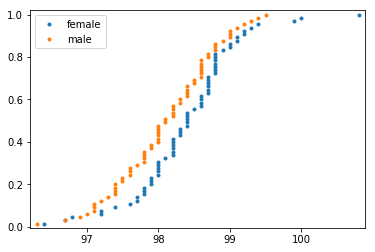

Actual difference in mean:
0.289230769231 degrees Fahrenheit


In [163]:
#Separating body temperatures by gender
male_filter = df['gender'] == 'M'
male_info = df.loc[male_filter]
male_temp = np.array(male_info['temperature'])


female_filter = df['gender'] == 'F'
female_info = df.loc[female_filter]
female_temp = np.array(female_info['temperature'])

#Plotting the ecdf
female_x, female_y = ecdf(female_temp)
male_x, male_y = ecdf(male_temp)

plt.plot(female_x, female_y, marker = '.', linestyle='none')
plt.plot(male_x, male_y, marker = '.', linestyle = 'none')

plt.margins(0.02)
plt.legend(('female','male'))

plt.show()

print('Actual difference in mean:')
print(observed_statistic , 'degrees Fahrenheit')

In [160]:
#Stimulating the collection of the data under the null hypothesis and comparing t-statistics to calculate p-value
concatenated_temp = np.concatenate((female_temp,male_temp))
perm_replicate = np.empty(100000)
for i in range(100000):
    perm_resample = np.random.permutation(concatenated_temp)
    perm_female = perm_replicate[:len(female_temp)]
    perm_male = perm_replicate[len(male_temp):]
    t_statistic = np.mean(perm_female) - np.mean(perm_male)
    perm_replicate[i] = t_statistic

observed_statistic = np.mean(female_temp) - np.mean(male_temp)

p_value = np.sum(perm_replicate >= observed_statistic) / len(perm_replicate)
print('P-value:')
p_value

P-value:


0.0

#### Conclusion: Our p-value is extremely small and is below 0.01 which means that the difference in the mean of the female and male body temperatures from our stimulation under the null hypothesis was as extreme as the actual difference between the mean of the female and male body temperatures less than 1% of the times. This implies statistical significance and we can at least conclude that there are some differences between male and female in normal temperature.